<H2> 課題1: データ前処理の実習 </H2>
<p>データの前処理は、データ分析の全行程のうち約8割を占める重要な工程です。</p>
<p>この課題ではkaggleのcompetitionで使用されたデータを用いてデータの前処理方法を確認します。</p>
<p>各列の詳細は下記サイトをご参照ください。</p>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<p>2章で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [1]:
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

%matplotlib inline


<H2>2. データの読み込み</H2>
<p>CSVファイル"kaggle_housing_price.csv"を読み込み、内容を確認します。</p>

In [2]:
# データ読み込み
dataset_bf_dummy = pd.read_csv('kaggle_housing_price.csv')

In [3]:
# データを最初の5行だけ表示
dataset_bf_dummy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# データの行数、列数を表示
print('# of raws: %i  # of columns: %i' % dataset_bf_dummy.shape )

# of raws: 1460  # of columns: 81


<h2>3. 要約統計量を出力する</h2>
<p> データ数、平均や中央値、標準偏差などの統計量を確認し、データへの理解を深めます。</p>

In [5]:
# 要約統計量を表示
dataset_bf_dummy.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<H2>4. 基本的なデータの操作</H2>


データの抽出・列の分割について学びます。

<h3> インデックスを用いた行の指定</h3>

In [6]:
# インデックス番号0~10の行を抽出
dataset_bf_dummy.ix[0:9]

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
# "SalePrice"と"LotArea"の列を抽出し、最初の10行だけ表示
dataset_bf_dummy.loc[0:9][['SalePrice', 'LotArea']]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


In [8]:
# "SalePrice"と"LotArea"の列を抽出し、最初の10行だけ表示
dataset_bf_dummy.ix[0:9][['SalePrice', 'LotArea']]

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


<h3>カラム間の演算</h3>

In [9]:
# "1stFlrSF"と"2ndFlrSF"を合計した"FlrSF_total"を新たな列として加える
dataset_bf_dummy['FlrSF_total'] = dataset_bf_dummy['1stFlrSF'] + dataset_bf_dummy['2ndFlrSF']

In [10]:
dataset_bf_dummy.loc[:9][['1stFlrSF', '2ndFlrSF', 'FlrSF_total']]

,1stFlrSF,2ndFlrSF,FlrSF_total
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198
5,796,566,1362
6,1694,0,1694
7,1107,983,2090
8,1022,752,1774
9,1077,0,1077


<h3>ダミー変数の作成</h3>
<p> ダミー変数についてはテキストP.61を参照ください。</p>

In [11]:
# 列'SaleType'をダミー変数に展開します。
dataset = pd.get_dummies(data=dataset_bf_dummy, columns=['SaleType'])

In [12]:
# ダミー変数が作成されていることを確認します　(dataset_bf_dummyの最初の5行だけ出力)
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3>フィルタリング</h3>

In [13]:
# 'YearBuilt'が2000以降の物件のみを抽出
dataset[dataset['YearBuilt'] > 2000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,1494,0,0,0,0,0,0,1,0,0
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,1114,0,0,0,0,0,0,0,0,1
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,2376,0,0,0,0,0,0,1,0,0
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,1795,0,0,0,0,0,0,0,0,1
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,1600,0,0,0,0,0,0,0,0,1
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,1704,0,0,0,0,0,0,0,0,1


In [14]:
# 'YearBuilt'が2000以降、'GarageCars'が2以上の物件を抽出
dataset[np.logical_and((dataset['YearBuilt'] >2000), (dataset['GarageCars'] >2))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,1494,0,0,0,0,0,0,1,0,0
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,2376,0,0,0,0,0,0,1,0,0
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,1600,0,0,0,0,0,0,0,0,1
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,1704,0,0,0,0,0,0,0,0,1
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,...,2452,0,0,0,0,0,0,0,0,1
47,48,20,FV,84.0,11096,Pave,NaN,Reg,Lvl,AllPub,...,1656,0,0,0,0,0,0,0,0,1
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,2945,0,0,0,0,0,0,1,0,0
65,66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,2473,0,0,0,0,0,0,0,0,1
82,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,1563,0,0,0,0,0,0,0,0,1


<h2>5. データの可視化</h2>

データを理解するには要約統計量や抽出したデータを確認するだけでは不十分であり、可視化が必要です。

<h3>ヒストグラム</h3>
<p>連続変数の分布を確認する際に有効</p>

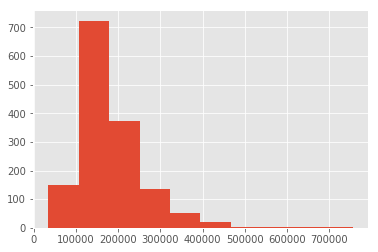

In [15]:
# dataset_bf_dummyの'SalePrice'をヒストグラムで表示
dataset['SalePrice'].hist()

<h3>散布図</h3>
<p>2つの変数の関係性を確認する際に有効</p>

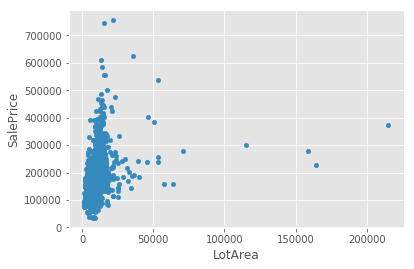

In [16]:
# dataset_bf_dummyの'LotArea'と'SalePrice'を散布図で表示
dataset.plot(kind='scatter', x='LotArea', y='SalePrice')

<h3>棒グラフ</h3>

大小や増減を比較する際に有効

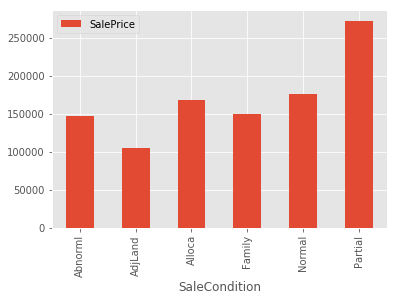

In [17]:
#dataset_bf_dummyの'SaleCondition'ごとに、'SalePrice'の平均を棒グラフで表示
SalePrice_by_SaleCondition = \
 dataset.groupby('SaleCondition').aggregate({'SalePrice':np.mean}).reset_index()

SalePrice_by_SaleCondition.plot.bar(x='SaleCondition')

<h3>箱ヒゲ図 (Boxplot) </h3>
<p> 複数の変数の分布を比較する際に有効 （棒グラフでは平均の比較はできますが、分布全体の比較はできません)</p>

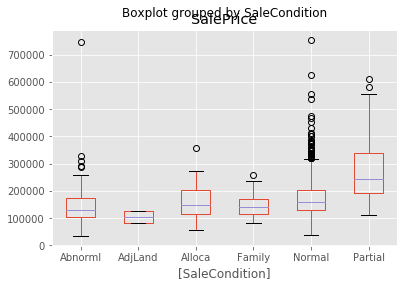

In [18]:
# dataset_bf_dummyの'SaleCondition'ごとに'SalePrice'をboxplotで表示
dataset[['SaleCondition', 'SalePrice']].boxplot(by='SaleCondition')

<h2>6. 欠損値の確認</h2>
<p> データに欠損値があると、演算でエラーが起きる場合があります。</p>
<p>欠損値の扱いは欠損が発生した原因により異なります。（テキストP. 69参照　）<p>

In [19]:
# 列ごとに欠損値の有無を確認
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, ' #of missing record:', missing_num)

dataset.dropna(inplace=True)

Id  #of missing record: 0
MSSubClass  #of missing record: 0
MSZoning  #of missing record: 0
LotFrontage  #of missing record: 259
LotArea  #of missing record: 0
Street  #of missing record: 0
Alley  #of missing record: 1369
LotShape  #of missing record: 0
LandContour  #of missing record: 0
Utilities  #of missing record: 0
LotConfig  #of missing record: 0
LandSlope  #of missing record: 0
Neighborhood  #of missing record: 0
Condition1  #of missing record: 0
Condition2  #of missing record: 0
BldgType  #of missing record: 0
HouseStyle  #of missing record: 0
OverallQual  #of missing record: 0
OverallCond  #of missing record: 0
YearBuilt  #of missing record: 0
YearRemodAdd  #of missing record: 0
RoofStyle  #of missing record: 0
RoofMatl  #of missing record: 0
Exterior1st  #of missing record: 0
Exterior2nd  #of missing record: 0
MasVnrType  #of missing record: 8
MasVnrArea  #of missing record: 8
ExterQual  #of missing record: 0
ExterCond  #of missing record: 0
Foundation  #of missing record: 0


In [20]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, ' #of missing record:', missing_num)

Id  #of missing record: 0
MSSubClass  #of missing record: 0
MSZoning  #of missing record: 0
LotFrontage  #of missing record: 0
LotArea  #of missing record: 0
Street  #of missing record: 0
Alley  #of missing record: 0
LotShape  #of missing record: 0
LandContour  #of missing record: 0
Utilities  #of missing record: 0
LotConfig  #of missing record: 0
LandSlope  #of missing record: 0
Neighborhood  #of missing record: 0
Condition1  #of missing record: 0
Condition2  #of missing record: 0
BldgType  #of missing record: 0
HouseStyle  #of missing record: 0
OverallQual  #of missing record: 0
OverallCond  #of missing record: 0
YearBuilt  #of missing record: 0
YearRemodAdd  #of missing record: 0
RoofStyle  #of missing record: 0
RoofMatl  #of missing record: 0
Exterior1st  #of missing record: 0
Exterior2nd  #of missing record: 0
MasVnrType  #of missing record: 0
MasVnrArea  #of missing record: 0
ExterQual  #of missing record: 0
ExterCond  #of missing record: 0
Foundation  #of missing record: 0
BsmtQ